# 14wk-1,2: MCMC (2)

최규빈  
2023-06-01

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-zN7idmV8iVcOs4zV2Lg8WE>

-   이 강의는 14wk-1, 14wk-2 의 강의가 합쳐져 있습니다.

# imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 약간의 이론

`-` **이론**: $\{X_t\}$가 IRR-HMC[1] 라고 하자.

1.  만약에 $\{X_t\}$가 정상분포를 가진다면 그 정상분포는 유일한
    정상분포이다.
2.  1이 성립한다면 $\{X_t\}$는 positive recurrent HMC가 된다.[2]
3.  $\{X_t\}$는 IRR-PR-HMC 이므로 주기를 논의할 수 있다.[3] 만약에
    $\{X_t\}$가 aperiodic 이면[4] $\{X_t\}$는 에르고딕 마코프체인이
    된다.
4.  따라서 이 경우는
    $\bar{\boldsymbol \pi} \to {\boldsymbol \pi} = {\bf p}_{\star}$ 가
    성립한다. (***nice case***)

`-` 무기: $\{X_t\}$가 IRR-HMC라고 할때 (1) 어떠한 방식으로든 정상분포가
존재함을 보이고 (유일함을 보이지 않더라도 유일해짐) (2) AP 임을 보이면
***nice case***가 된다.

> 사실상 periodicity는 $\frac{1}{2}({\bf P} + {\bf I})$ 와 같은 방식으로
> 쉽게 kill 할 수 있으므로 “$\exists {\boldsymbol \pi}$”를 보이면
> ***nice case*** 를 만들수 있다고 봐야함.

`-` **Thm**: $\{X_t\}$가 IRR-HMC라고 하고 ${\bf P}$ 가 $\{X_t\}$의
transition matrix (혹은 그 비슷한 것) 이라고 하자. 분포의 정의를
만족하는 어떠한 벡터 ${\boldsymbol \mu}$가 아래의 조건을 만족한다면

$$\forall i,j \in E:~\mu_ip_{ij} = \mu_jp_{ji} \quad \quad \cdots (\star)$$

벡터 ${\boldsymbol \mu}$는 정상분포이다. 즉 아래가 성립한다.

$${\boldsymbol \mu}^\top {\bf P} = {\boldsymbol \mu}^\top \quad \cdots (\star\star)$$

단 여기에서 편의상 아래와 같이 생각하자.

-   ${\boldsymbol \mu}^\top = [\mu_0,\mu_1,\dots]$

-   ${\bf P} = \begin{bmatrix} p_{00} & p_{01} & \dots \\ p_{10} & p_{11} & \dots \\ \dots & \dots & \dots \end{bmatrix}$

`-` 조건 $(\star)$를 detailed balance condition (DBC) 라고 부른다. 이
조건은 정상분포가 존재할 조건 $(\star\star)$ 보다 강한조건이다. 즉
$(\star) \Rightarrow (\star\star)$ 이다.

`-` DBC가 ${\boldsymbol \mu}^\top {\bf P} = {\boldsymbol \mu}^\top$ 를
하는 이유를 체크하기 위해서 $(\star)$의 양변에 $\sum_i$를 취하면 된다.
아래의 1,2,3을 관찰해볼 것.

1.  $\forall j\in E:~ \sum_{i}\mu_i p_{ij} = \sum_{i} \mu_j p_{ji}$
2.  $\forall j\in E:~ \sum_{i}\mu_i p_{ij} = \mu_j$
3.  ${\boldsymbol \mu}^\top {\bf P} = {\boldsymbol \mu}^\top$

`-` (용어) DBC를 만족하는 마코프체인을 ***reversible*** 하다고 표현하다.

# Toy Example

`-` 예시1: 아래와 같은 transitio matrix를 고려하자. (08wk-1에 소개된
예제)

[1] irreducible 한 homogeneous markov chain

[2] IRR-HMC 에서는 PR 조건과 $\exists! {\boldsymbol \pi}$ 조건이
동치이므로.

[3] 주기를 논의할 수 있는 이유는 모든 상태가 recurrent 하므로.

[4] 즉 모든 상태에 대한 주기가 1이라면.

In [44]:
P = np.array([[0.4,0.6],
              [0.9,0.1]])
P

아래와 같은 벡터를 고려하자.

In [46]:
π = np.array([[0.6],[0.4]]) 
π.T

${\boldsymbol \pi}$가 DBC조건을 만족하는지 체크하자.[1]

[1] 아직은 ${\boldsymbol \pi}$가 정상분포인것은 모르지만 만약에 DBC를
만족하면 ${\boldsymbol \pi}$를 정상분포라고 주장할 수 있음

In [54]:
# i=0, j=0
π[0]*P[0,0], π[0]*P[0,0]

In [55]:
# i=0, j=1
π[0]*P[0,1], π[1]*P[1,0]

In [56]:
# i=1, j=0
π[1]*P[1,0], π[0]*P[0,1]

In [57]:
# i=1, j=1
π[1]*P[1,1], π[1]*P[1,1]

DBC를 만족하므로 ${\boldsymbol \pi}$는 정상분포이다. 또한 이 예제에서는
IRR조건이 만족하므로 이 정상분포는 유일해진다. 그리고 IRR이고
“$\exists! {\boldsymbol \pi}$” 이므로 이 마코프체인은 PR이다. 그리고 이
마코프체인은 AP이므로 결국에는 에르고딕 마코프체인이 된다.

`-` 샘플링: 아래와 같은 분포 ${\boldsymbol \pi}$를 따르는 확률변수 $X$를
생성하고 싶다고 하자.

|        $X$        |  $0$  |  $1$  |
|:-----------------:|:-----:|:-----:|
| $\mathbb{P}(X=k)$ | $0.6$ | $0.4$ |

그렇다면 아래와 같은 ${\bf P}$에서 계속 샘플링을 하면 된다.

In [58]:
P

In [64]:
def rain(before):
    if before == 0: 
        after = np.random.rand() < 0.6
    else:
        after = np.random.rand() < 0.1
    return after*1

In [79]:
def doctor_strange(x0):
    lst = [x0]
    for t in range(10500): 
        lst.append(rain(lst[t]))
    return lst 

In [80]:
xx = doctor_strange(0)

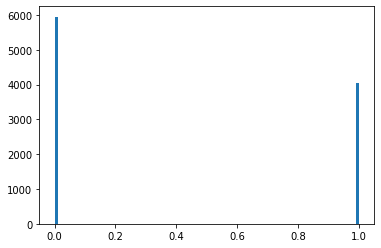

In [84]:
plt.hist(xx[501:],bins=100);

`-` 샘플링이 성공하는 이유? (당연한 것 같은데 그래도 써보면)

아래와 같은 조건부확률에 따라 $X$에서 $X'$을 반복적으로 만들면

-   $p_{00} = \mathbb{P}(X'=0 | X=0)=0.4$
-   $p_{01} = \mathbb{P}(X'=1 | X=0)=0.6$
-   $p_{10} = \mathbb{P}(X'=0 | X=1)=0.9$
-   $p_{11} = \mathbb{P}(X'=1 | X=1)=0.1$

결국 $X_{\infty}$는 분포 ${\boldsymbol \pi}^\top = [0.6, 0.4]$를 pmf로
가진다. 이러한 분포의 히스토그램은 원래

$$X_{\infty}(\omega_1),X_{\infty}(\omega_2),X_{\infty}(\omega_3),\dots$$

와 같은 샘플을 모아서 그려야 하지만

$$X_{T_0}(\omega_1),X_{T_0+1}(\omega_1),X_{T_0+2}(\omega_2),\dots$$

와 같은 샘플을 모아서 그릴 수 있다.[1] 여기에서 $T_0$는 적당히 큰
숫자이고 우리의 예제의 경우 $T_0=500$을 설정하였다.

`-` 주의: 물론 이 예제는 샘플링이 어렵지 않습니다. 아래와 같이 뽑아도
됩니다.

[1] $X_{T_0}(\omega_1),X_{T_0+1}(\omega_1),X_{T_0+2}(\omega_2),\dots$ 는
동일한 분포를 가짐

In [90]:
xx = (np.random.rand(10000) < 0.4)*1

# MCMC

## 샘플추천X & 이산형

`-` 모티브: 위의 예제에서 전이행렬이 꼭 아래와 같을 필요는 없는것
아닌가?

In [91]:
P

`-` 우리의 목표: 아래와 같은 분포 ${\boldsymbol \pi}$를 따르는 확률변수
$X$를 생성하기만 하면 되는 것 아닌가?

|        $X$        |  $0$  |  $1$  |
|:-----------------:|:-----:|:-----:|
| $\mathbb{P}(X=k)$ | $0.6$ | $0.4$ |

이러한 정상분포를 가지는 에르고딕 마코프체인의 전이행렬 ${\bf P}$를
역으로 설계해보자.

In [104]:
P = np.array([[0.6,0.4],
              [0.6,0.4]])

In [105]:
P

`-` DBC 체크: 아래의 detailed balance condition을 만족하기만 하면 target
distribution ${\boldsymbol \pi}$는 새롭게 설계한 ${\bf P}$를 가지는 HMC
$\{X_t\}$의 정상분포라 주장할 수 있다.

$$\forall i,j \in E:~ \pi_ip_{ij}=\pi_jp_{ji}$$

이 예제의 경우

$$\forall i,j \in E:~ \pi_i\pi_{j}=\pi_j\pi_{i}$$

가 되므로 성립한다.

`-` 따라서 전이행렬 ${\bf P}$를 가지는 마코프체인은
${\boldsymbol \pi}^\top=[0.4,0.6]$를 정상분포로 가지는
마코프체인이다.[1] 이 마코프체인은 IRR 이므로 정상분포
${\boldsymbol \pi}$는 유일한 정상분포가 되고, 따라서 PR조건이 만족된다.
또한 AP를 만족하므로 에르고딕 마코프체인이 된다.

[1] DBC를 만족하기 때문에

In [112]:
P

In [113]:
def doctor_strange(x0):
    xx = [x0]
    for t in range(10500): 
        _u = np.random.rand()
        if _u < 0.4:
            xx.append(1)
        else:
            xx.append(0)
    return xx 

In [108]:
xx = doctor_strange(0)

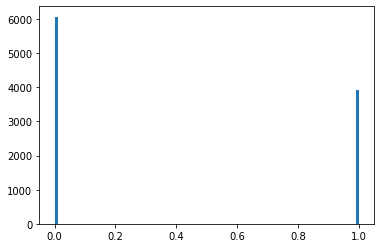

In [109]:
plt.hist(xx[501:],bins=100);

`-` 이러한 방식은 유한차원으로 확장가능하다. (그런데 귀찮다)

|        $X$        |  $0$  |  $1$  |  $2$  |
|:-----------------:|:-----:|:-----:|:-----:|
| $\mathbb{P}(X=k)$ | $0.6$ | $0.2$ | $0.2$ |

In [120]:
P = np.array([[0.6,0.2,0.2],
              [0.6,0.2,0.2],
              [0.6,0.2,0.2]])

In [121]:
def doctor_strange(x0):
    xx = [x0]
    for t in range(10500): 
        _u = np.random.rand()
        if _u < 0.6:
            xx.append(0)
        elif _u< 0.8:
            xx.append(1)
        else:
            xx.append(2)        
    return xx 

In [122]:
xx = doctor_strange(0)

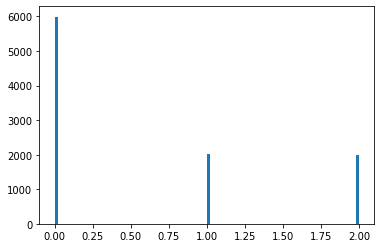

In [124]:
plt.hist(xx[501:],bins=100);

## 샘플추천 & 이산형

`-` 아래의 분포를 고려하자.

In [138]:
np.random.seed(43052)
u = np.random.rand(10)
π = (u/u.sum()).reshape(-1,1)
π.T

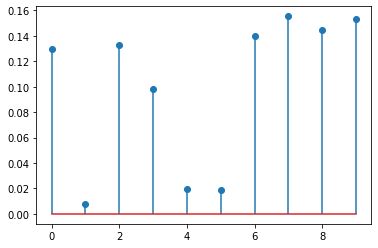

In [139]:
plt.stem(π)

`-` 이러한 분포에서 샘플을 뽑는 상황을 고려하자.

-   위의 코드로는 못하겠다.
-   다른 방법은 없을까?

> 그냥 저번시간처럼 하자. $x$에서 $x'$으로 가는 확률을 다 정의하지 말고,
> $x'$를 적당히 추천받고 옮겨탈지 말지 결정하자.

`-` 저번시간 테크닉: $X(\omega_1)=x$가 주어졌을때 $X'(\omega_1)=x'$를
뽑는 방법!

1.  $x$가 주어졌다고 가정하자.
2.  $x'$의 후보로 $Y(\omega^\ast)=y$를 뽑는다.
    $Y \sim {\boldsymbol p}_Y:=[\frac{1}{10},\dots,\frac{1}{10}]$
3.  $x'$은 $x$가 적절한지, 아니면 추천받은 $y$가 적절한지 따져보고
    결정한다. 즉 아래의 확률로 $x'=y$를 선택한다.

$$\frac{\pi_y}{\pi_x + \pi_y}$$

`-` 의문: 저렇게 막 만들어도 에르고딕한지 어떻게 알지?

-   당연히 몰라요.
-   조사를 좀 해봐야 합니다.

`-` DBC condition 체크

$$\forall i,j \in E:~ \pi_ip_{ij}=\pi_jp_{ji}$$

노테이션을 살짝 변경하면 아래와 같다.

$$\forall x,x' \in E:~ \pi_xp_{xx'}=\pi_{x'}p_{x'x}$$

여기에서 $p_{xx'}$와 $p_{x'x}$를 각각 구하면 아래와 같다.

$$p_{xx'} = \frac{1}{10}\frac{\pi_{x'}}{\pi_x + \pi_{x'}}$$

$$p_{x'x} = \frac{1}{10}\frac{\pi_{x}}{\pi_x + \pi_{x'}}$$

따라서 DBC가 성립한다.

`-` 이론전개: DBC가 만족되었으므로 ${\boldsymbol \pi}$는 정상분포가
된다. 그리고 이 마코프체인은 IRR 이므로 정상분포는 유일해진다. 또한
IRR-HMC에서는 유일한 정상분포의 존재와 PR이 동치이므로 이 마코프체인은
PR이 된다. 또한 이 마코프체인은 AP조건을 만족한다. 따라서 이
마코프체인은 에르고딕이 된다.

In [164]:
def doctor_strange(x0):
    xx = [x0]
    for t in range(100500): 
        y = np.random.choice(range(10))
        acceptance_prob = π[y]/(π[xx[t]]+π[y]) ## acceptance_prob 가 클수록 y가 선택
        _u = np.random.rand()
        if _u < acceptance_prob:
            xx.append(y)
        else:
            xx.append(xx[t])
    return xx 

In [165]:
xx = doctor_strange(0)

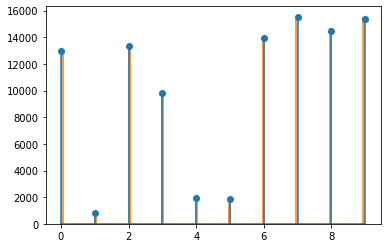

In [166]:
plt.stem(π*100000)
plt.hist(xx[501:],bins=100,color='C1',alpha=0.8);

***참고***

``` python
### 비교를 위해 이전에 만들었던 코드를 확인해보자.
T = 100000
xx = [0.99]
for t in range(T):
    y = np.random.rand()
    thresh_prob = f(y)/(f(xx[t])+f(y)) ## thresh_prob 가 클수록 y가 선택
    _u = np.random.rand()
    if _u < thresh_prob:
        xx.append(y) 
    else:
        xx.append(xx[t])
```

## 샘플추천 & 연속형

`-` 아래와 같은 pdf $f_X(x)$를 가지는 확률변수를 만들고 싶다면?

In [171]:
g = scipy.special.gamma

In [172]:
def f(x): 
    return g(2+6)/(g(2)*g(6)) * x**(2-1) * (1-x)**(6-1)

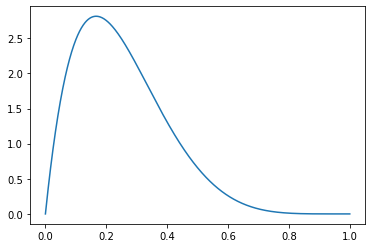

In [173]:
_x = np.linspace(0,1,1000)
plt.plot(_x, f(_x))

`-` 어? 잠깐만..

-   이전예제: $E= \{0,1,2,3,4,5,6,7,8,9\}$
-   지금예제: $E= [0,1]$

상태공간 $E$ coutable 이 아니잖아? (그래도 일단 진행해보자)

`-` 테크닉: $X(\omega_1)=x$가 주어졌을때 $X'(\omega_1)=x'$를 뽑는 방법!

1.  $x$가 주어졌다고 가정하자.
2.  $x'$의 후보로 $Y(\omega^\ast)=y$를 뽑는다. $Y \sim {\cal U}$
3.  $x'$은 $x$가 적절한지, 아니면 추천받은 $y$가 적절한지 따져보고
    결정한다. 즉 아래의 확률로 $x'=y$를 선택한다.

$$\frac{f_X(y)}{f_X(x) + f_X(y)}$$

`-` DBC condition 체크

***이전예제***

$$\forall x,x' \in E:~ \pi_xp_{xx'}=\pi_{x'}p_{x'x}$$

***지금예제***

$$\forall x,x' \in E:~ f_X(x)p_{xx'}=f_X(x')p_{x'x}$$

여기에서 $p_{xx'}$와 $p_{x'x}$는 대충 아래와 같이 쓸 수 있을것 같다.

$$p_{xx'} = f_Y(x')\frac{f_X(x')}{f_X(x) + f_X(x')}$$

$$p_{x'x} = f_Y(x)\frac{f_X(x)}{f_X(x) + f_X(x')}$$

우선 $f_Y(x')=f_Y(x)=1$ 이므로 지금까지의 논의가 맞다면 DBC는 만족된다.

`-` 의문1: 좀 이상한데? $f_X(x)$는 $\pi_x$와 다르게 확률을 의미하는게
아니잖아?

`-` 의문2: 애초에 HMC $\{X_t\}$를 coutable한 state space를 가진다고
정의하지 않았어?

# Polish space

`-` MCMC 샘플링이 성공하는 이유를 다시 생각해보자.

아래와 같은 조건부확률에 따라 $X$에서 $X'$을 반복적으로 만들면

-   $p_{00} = \mathbb{P}(X'=0 | X=0)=0.4$
-   $p_{01} = \mathbb{P}(X'=1 | X=0)=0.6$
-   $p_{10} = \mathbb{P}(X'=0 | X=1)=0.9$
-   $p_{11} = \mathbb{P}(X'=1 | X=1)=0.1$

…. 중략

`-` 그런데 조건부 “확률”은 잘 정의할 수 있나?

-   할 수 있음.
-   상태공간이 $E$가 countable 일 경우에는 좀 쉬운편입니다. 그리고
    조건부확률들을 모아서 매트릭스 (혹은 그 비슷한것) ${\bf P}$를 만들수
    있음.
-   상태공간이 $E$가 uncoutable 일 경우에는 좀 까다로운데 polish
    space라는 곳에서는 잘 정의됨. 그리고 조건부확률들을 모아서 매트릭스
    (혹은 그 비슷한것) ${\bf P}$를 만들 수는 없지만 대신에 transition
    kernel 이라는 것은 정의할 수 있습니다.

`-` 좀 더 이론적인건 엄밀하게 따져야하지만 (대학원외의 과정, 개인적으로
공부하고 싶으면 공부하는 영역임) 하여튼 연속형일 경우에도 가능합니다.

> 아무튼 연속형일 경우도 이산형처럼 가능하다.

`-` 앞으로는 연속형일지라도 이산형처럼 생각해서 논리전개하세요.

# 메트로폴리스-헤이스팅스

`-` 이전의 테크닉: $X(\omega_1)=x$가 주어졌을때 $X'(\omega_1)=x'$를 뽑는
방법!

1.  $x$가 주어졌다고 가정하자.
2.  $x'$의 후보로 $Y(\omega^\ast)=y$를 뽑는다.
    $Y \sim {\boldsymbol p}_Y:=[\frac{1}{10},\dots,\frac{1}{10}]$
3.  $x'$은 $x$가 적절한지, 아니면 추천받은 $y$가 적절한지 따져보고
    결정한다. 즉 아래의 확률로 $x'=y$를 선택한다.

$${\tt acceptance ~prob} =\frac{\pi_y}{\pi_x + \pi_y}$$

`-` 새로운 테크닉: $X(\omega_1)=x$가 주어졌을때 $X'(\omega_1)=x'$를 뽑는
방법!

1.  $x$가 주어졌다고 가정하자.
2.  $x'$의 후보로 $Y(\omega^\ast)=y$를 뽑는다.
    $Y \sim {\boldsymbol p}_Y:=[\frac{1}{10},\dots,\frac{1}{10}]$
3.  $x'$은 $x$가 적절한지, 아니면 추천받은 $y$가 적절한지 따져보고
    결정한다. 즉 아래의 확률로 $x'=y$를 선택한다.

$${\tt acceptance ~prob} =\min\left(1,\frac{\pi_y}{\pi_x}\right)$$

`-` DBC를 만족하는지 체크

$$\forall x,x' \in E:~ \pi_xp_{xx'}=\pi_{x'}p_{x'x}$$

여기에서 $p_{xx'}$와 $p_{x'x}$를 각각 구하면 아래와 같다.

$$p_{xx'} = \frac{1}{10}\min\left(1,\frac{\pi_{x'}}{\pi_x}\right)$$

$$p_{xx'} = \frac{1}{10}\min\left(1,\frac{\pi_{x}}{\pi_{x'}}\right)$$

경우를 (1) $\pi_{x'} > \pi_x$ (2) $\pi_{x'} < \pi_x$ 와 같이 나누어
풀어보면 DBC를 만족함을 쉽게 체크할 수 있다. 이후에 위의 예제들과 동일한
논리전개를 따르면 $\{X_t\}$ 가 에르고딕 마코프체인임을 보일 수 있다.
따라서 새로운 테크닉으로 샘플을 뽑아도 무방하다.